In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pulsestreamer as ps
import time
from scipy.optimize import curve_fit
import visa
from ThorlabsPM100 import ThorlabsPM100

In [7]:
rm = visa.ResourceManager()
inst = rm.open_resource('USB0::0x1313::0x8078::P0034869::INSTR', timeout=1)
power_meter = ThorlabsPM100(inst=inst)

In [8]:
power_meter.configure.scalar.power()
print("Measurement type :", power_meter.getconfigure)
print("Current value    :", power_meter.read)

Measurement type : POW
Current value    : 0.000936342811


In [9]:
pulsestreamer.pulse_streamer.constant(ps.OutputState([0], 0.04, 0))

Measurement loop for saturation

In [10]:
vol_range = np.linspace(0.0, 0.1, 20)
pow_range = np.zeros_like(vol_range)
counts = np.zeros_like(vol_range)
for i, vol in enumerate(vol_range):
    pulsestreamer.pulse_streamer.constant(ps.OutputState([0], vol, 0))
    time.sleep(6)
    pow_range[i] = power_meter.read
    counts[i] = np.mean(counterlogic.countdata)

Plotting and fitting [Momenzadeh Thesis]

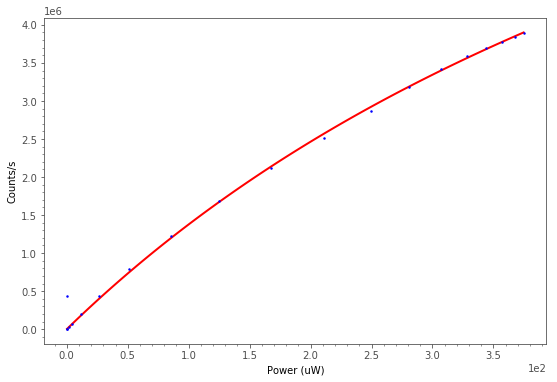

Fs(MC/s) 11.717038655771745
Ps(mW) 0.7509941214157613


In [14]:
def objective(P, Fs, Ps):
    return Fs/(1+(Ps/P))

ratio = 0.4

popt,_ = curve_fit(objective, pow_range*ratio, counts, p0 = [400000, 30e-6])

x_fit = np.linspace(pow_range.min()*ratio, pow_range.max()*ratio, 100)

fig, ax = plt.subplots()
ax.plot(x_fit*1e6, objective(x_fit, *popt), 'r-')
ax.plot(pow_range*ratio*1e6, counts, 'b.')

ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
ax.set_xlabel('Power (uW)')
ax.set_ylabel('Counts/s')
plt.show()
Fs = popt[0]/1e6
Ps = popt[1]*1e3
print('Fs(MC/s)',Fs)
print('Ps(mW)',Ps)

Save routine

In [8]:
filelabel = 'tip_R03C-F7-C9_LT'
parameters = {'Fs':popt[0], 'Ps': popt[1]}
data =  {'Pow (W), Counts (c/s)': np.array((pow_range*0.738, counts)).T}
filepath = savelogic.get_path_for_module(module_name='Saturation')
savelogic.save_data(data, parameters=parameters, filepath=filepath, filelabel=filelabel, plotfig=fig, delimiter='\t')